# Extracão

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix, classification_report)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Telecom_churn.csv'
df = pd.read_csv(file_path, encoding='latin-1', sep=',', low_memory=False)
print("Dados extraídos com sucesso")

Dados extraídos com sucesso


# 1. Carga de Dados

In [ ]:
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [ ]:
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [ ]:
print("\n--- Informações do Dataset (dtypes e nulos) ---")
df.info()


--- Informações do Dataset (dtypes e nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     1

In [ ]:
print("\n--- Análise da Variável churn ---")
print("\nContagem de Churn (0: Não Evadiu, 1: Evadiu):")
churn_counts = df['churn'].value_counts()
print(churn_counts.to_markdown(numalign="left", stralign="left"))
print("\n")

print("\nPercentual de Churn:")
churn_percentage = df['churn'].value_counts(normalize=True) * 100
print(churn_percentage.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))
print("\n")


--- Análise da Variável churn ---

Contagem de Churn (0: Não Evadiu, 1: Evadiu):
| churn   | count   |
|:--------|:--------|
| 0       | 50438   |
| 1       | 49562   |



Percentual de Churn:
| churn   | proportion   |
|:--------|:-------------|
| 0       | 50.44        |
| 1       | 49.56        |




# 2. Limpeza e Pré-processamento (Dados Ausentes)

In [ ]:
print("--- Verificando Inconsistências nos Dados ---")
print("\nContagem de valores ausentes por coluna antes do tratamento:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

--- Verificando Inconsistências nos Dados ---

Contagem de valores ausentes por coluna antes do tratamento:
|                  | 0     |
|:-----------------|:------|
| rev_Mean         | 357   |
| mou_Mean         | 357   |
| totmrc_Mean      | 357   |
| da_Mean          | 357   |
| ovrmou_Mean      | 357   |
| ovrrev_Mean      | 357   |
| vceovr_Mean      | 357   |
| datovr_Mean      | 357   |
| roam_Mean        | 357   |
| change_mou       | 891   |
| change_rev       | 891   |
| drop_vce_Mean    | 0     |
| drop_dat_Mean    | 0     |
| blck_vce_Mean    | 0     |
| blck_dat_Mean    | 0     |
| unan_vce_Mean    | 0     |
| unan_dat_Mean    | 0     |
| plcd_vce_Mean    | 0     |
| plcd_dat_Mean    | 0     |
| recv_vce_Mean    | 0     |
| recv_sms_Mean    | 0     |
| comp_vce_Mean    | 0     |
| comp_dat_Mean    | 0     |
| custcare_Mean    | 0     |
| ccrndmou_Mean    | 0     |
| cc_mou_Mean      | 0     |
| inonemin_Mean    | 0     |
| threeway_Mean    | 0     |
| mou_cvce_Mean    | 0

In [ ]:
cols_low_missing = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean',
                    'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'eqpdays']

for col in cols_low_missing:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

df['dualband'] = df['dualband'].fillna(df['dualband'].mode()[0])
df['refurb_new'] = df['refurb_new'].fillna(df['refurb_new'].mode()[0])
df['phones'] = df['phones'].fillna(df['phones'].median())
df['models'] = df['models'].fillna(df['models'].median())

In [ ]:
cols_avg6 = ['avg6mou', 'avg6qty', 'avg6rev']
for col in cols_avg6:
    df[col] = df[col].fillna(0)

In [ ]:
cols_categ_missing = ['prizm_social_one', 'area', 'hnd_webcap', 'ownrent', 'dwlltype',
                      'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'creditcd',
                      'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']

for col in cols_categ_missing:
    df[col] = df[col].fillna('Missing')

In [ ]:
cols_num_missing = ['truck', 'rv', 'lor', 'adults', 'income', 'numbcars', 'forgntvl']

for col in cols_num_missing:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [ ]:
print("--- Verificando Inconsistências nos Dados ---")
print("\nContagem de valores ausentes por coluna após tratamento:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

--- Verificando Inconsistências nos Dados ---

Contagem de valores ausentes por coluna após tratamento:
|                  | 0   |
|:-----------------|:----|
| rev_Mean         | 0   |
| mou_Mean         | 0   |
| totmrc_Mean      | 0   |
| da_Mean          | 0   |
| ovrmou_Mean      | 0   |
| ovrrev_Mean      | 0   |
| vceovr_Mean      | 0   |
| datovr_Mean      | 0   |
| roam_Mean        | 0   |
| change_mou       | 0   |
| change_rev       | 0   |
| drop_vce_Mean    | 0   |
| drop_dat_Mean    | 0   |
| blck_vce_Mean    | 0   |
| blck_dat_Mean    | 0   |
| unan_vce_Mean    | 0   |
| unan_dat_Mean    | 0   |
| plcd_vce_Mean    | 0   |
| plcd_dat_Mean    | 0   |
| recv_vce_Mean    | 0   |
| recv_sms_Mean    | 0   |
| comp_vce_Mean    | 0   |
| comp_dat_Mean    | 0   |
| custcare_Mean    | 0   |
| ccrndmou_Mean    | 0   |
| cc_mou_Mean      | 0   |
| inonemin_Mean    | 0   |
| threeway_Mean    | 0   |
| mou_cvce_Mean    | 0   |
| mou_cdat_Mean    | 0   |
| mou_rvce_Mean    | 0   |
| owy

# 3. Engenharia de Features

In [ ]:
# Novas váriaveis. Adicionando +1 no denominador para evitar divisão por zero
df['rev_per_minute'] = df['rev_Mean'] / (df['mou_Mean'] + 1)
df['calls_per_month'] = df['totcalls'] / (df['months'] + 1)
df['eqp_age_index'] = df['eqpdays'] / (df['months'] + 1)

In [ ]:
# 5 originais + 3 criadas
features_expandidas = [
    'months', 'rev_Mean', 'mou_Mean', 'totcalls', 'eqpdays',
    'rev_per_minute', 'calls_per_month', 'eqp_age_index',
    'custcare_Mean',
    'drop_vce_Mean',
    'blck_vce_Mean',
    'avgmou',
    'avgrev'
]

X = df[features_expandidas]
y = df['churn']

#4. Treinameto dos modelos: Regressão Logística, Random Forest, XGBoost, SVM e Rede Neural (MLP)

In [ ]:
# Preparação dos Dados
X = df[features_expandidas]
y = df['churn']

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Escalonamento (SVM e Redes Neurais)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Para modelos baseados em árvore
X_train_tree = X_train.copy()
X_test_tree = X_test.copy()

In [ ]:
# Definição dos Modelos
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Rede Neural (MLP)": MLPClassifier(
        hidden_layer_sizes=(100, 50),
        max_iter=500,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    )
}


In [ ]:
print("Comparação de modelos (F1-Score):\n")

for nome, modelo in modelos.items():
    if nome in ["Regressão Logística", "SVM", "Rede Neural (MLP)"]:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train_tree, y_train)
        y_pred = modelo.predict(X_test_tree)

    f1 = f1_score(y_test, y_pred)
    print(f"{nome}: F1 = {f1:.4f}")

Comparação de modelos (F1-Score):

Regressão Logística: F1 = 0.5368
SVM: F1 = 0.6111
Rede Neural (MLP): F1 = 0.6058
Random Forest: F1 = 0.5934
XGBoost: F1 = 0.6152


**Avaliação de métricas**

In [ ]:
lista_metricas = []

print("Calculando métricas para cada modelo...\n")

for nome, modelo in modelos.items():

    if nome in ['Regressão Logística', 'SVM', 'Rede Neural (MLP)']:
        X_test_modelo = X_test_scaled
    else:
        X_test_modelo = X_test_tree

    # Previsões
    y_pred = modelo.predict(X_test_modelo)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    lista_metricas.append({
        'Modelo': nome,
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1
    })

df_comparacao = (
    pd.DataFrame(lista_metricas)
    .set_index('Modelo')
    .sort_values(by='F1-Score', ascending=False)
)

df_comparacao

Calculando métricas para cada modelo...



,Acurácia,Precisão,Recall,F1-Score
Modelo,,,,
XGBoost,0.61030,0.602398,0.628531,0.615187
SVM,0.58985,0.576411,0.650323,0.611140
Rede Neural (MLP),0.58850,0.576692,0.638015,0.605805
Random Forest,0.59505,0.590605,0.596146,0.593362
Regressão Logística,0.56970,0.575352,0.503027,0.536764


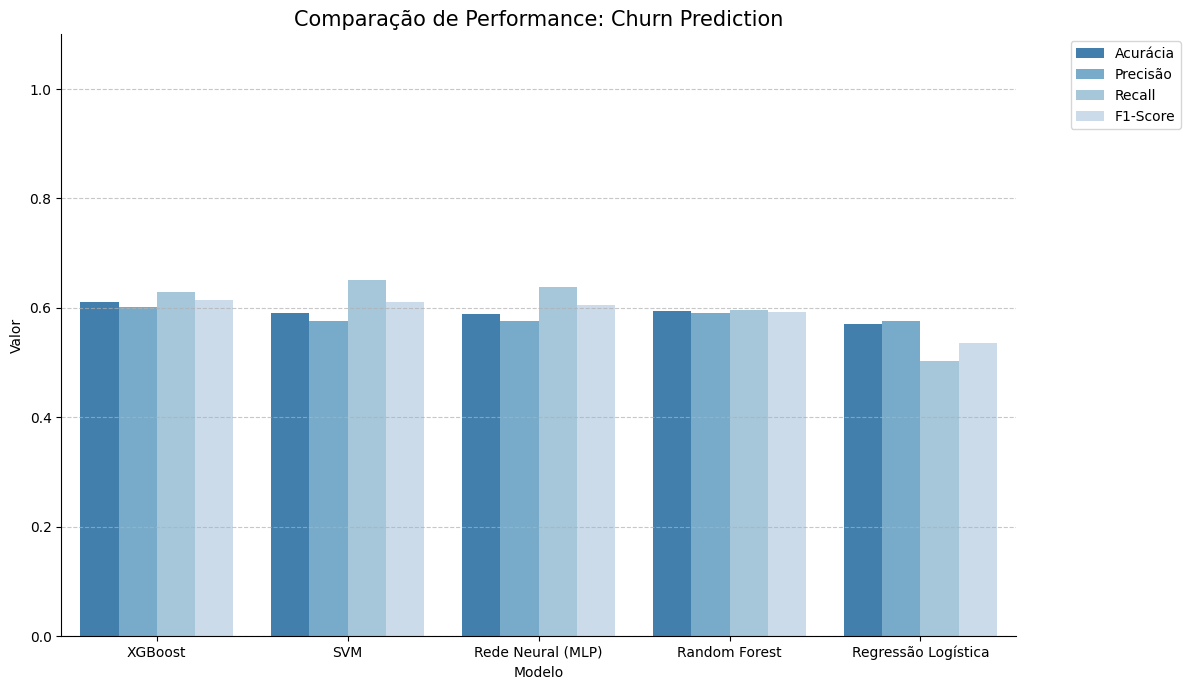

In [ ]:
plt.figure(figsize=(12, 7))
df_plot = df_comparacao.reset_index().melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

sns.barplot(data=df_plot, x='Modelo', y='Valor', hue='Métrica', palette='tab20c')
plt.title('Comparação de Performance: Churn Prediction', fontsize=15)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

# 5. Treinamento e Avaliação do Modelo Escolhido - XGBoost

In [ ]:
modelo_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Treinamento do XGBoost
modelo_xgb.fit(X_train_tree, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Limiar de Equilíbrio (Threshold)
y_probs = modelo_xgb.predict_proba(X_test_tree)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Cálculo do F1 para cada threshold
f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

y_pred_final = (y_probs >= best_threshold).astype(int)

print(f"Threshold ótimo: {best_threshold:.2f}\n")
print(classification_report(y_test, y_pred_final))

Threshold ótimo: 0.35

              precision    recall  f1-score   support

           0       0.72      0.24      0.35     10088
           1       0.54      0.91      0.68      9912

    accuracy                           0.57     20000
   macro avg       0.63      0.57      0.52     20000
weighted avg       0.63      0.57      0.51     20000



# 6. Métricas

In [ ]:
print("MÉTRICAS FINAIS – XGBoost Ajustado\n")

print(f"Acurácia : {accuracy_score(y_test, y_pred_final):.2f}")
print(f"Precisão : {precision_score(y_test, y_pred_final):.2f}")
print(f"Recall   : {recall_score(y_test, y_pred_final):.2f}")
print(f"F1-Score : {f1_score(y_test, y_pred_final):.2f}")

MÉTRICAS FINAIS – XGBoost Ajustado

Acurácia : 0.57
Precisão : 0.54
Recall   : 0.91
F1-Score : 0.68


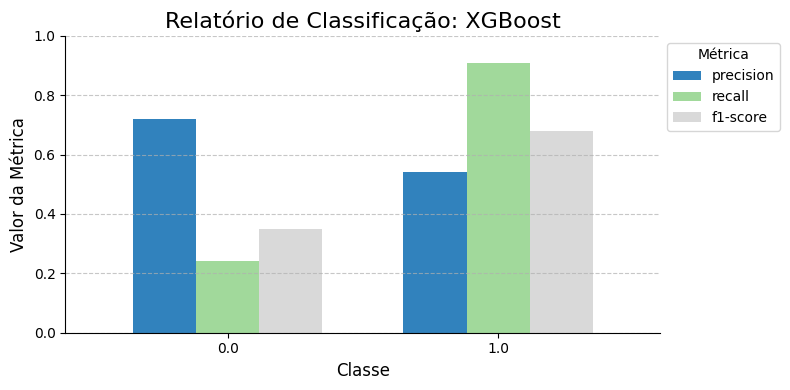

In [ ]:
# Dados do relatório de classificação do XGBoost
rf_report = {
    "precision": {"0.0": 0.72, "1.0": 0.54},
    "recall": {"0.0": 0.24, "1.0": 0.91},
    "f1-score": {"0.0": 0.35, "1.0": 0.68},
    "support": {"0.0": 10088, "1.0": 9912}
}

df_rf_report = pd.DataFrame(rf_report).drop(columns=['support'])

fig, ax = plt.subplots(figsize=(8, 4))
df_rf_report.plot(kind='bar', ax=ax, width=0.7, colormap='tab20c')
ax.set_title('Relatório de Classificação: XGBoost', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Métrica', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

In [ ]:
# Calculando métricas com o threshold equilibrado
y_pred_final = (y_probs >= best_threshold).astype(int)

metricas_novas = {
    'Acurácia': accuracy_score(y_test, y_pred_final),
    'Precisão': precision_score(y_test, y_pred_final),
    'Recall': recall_score(y_test, y_pred_final),
    'F1-Score': f1_score(y_test, y_pred_final)
}

print("--- MÉTRICAS (XGBoost Equilibrado + Novas Features) ---")
for m, v in metricas_novas.items():
    print(f"{m}: {v:.2f}")

# Comparação com o resultado anterior (estimativa de melhora)
print(f"\nMelhoria no F1-Score: {((metricas_novas['F1-Score'] / 0.6099) - 1)*100:.2f}%")

--- MÉTRICAS (XGBoost Equilibrado + Novas Features) ---
Acurácia: 0.57
Precisão: 0.54
Recall: 0.91
F1-Score: 0.68

Melhoria no F1-Score: 10.71%


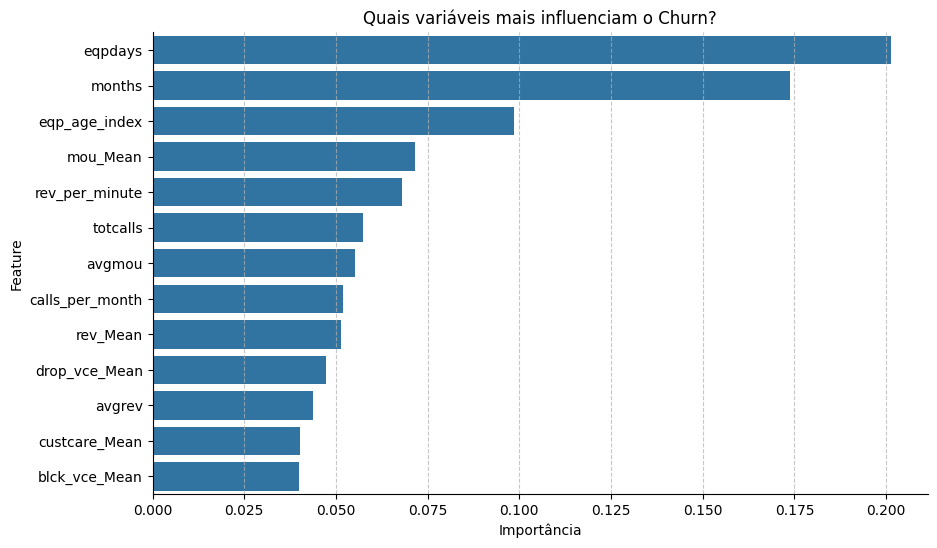

In [ ]:
importancias = modelo_xgb.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features_expandidas, 'Importância': importancias})
feature_imp_df = feature_imp_df.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Feature', data=feature_imp_df)
plt.title('Quais variáveis mais influenciam o Churn?')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()


Matriz de Confusão:
[[2377 7711]
 [ 930 8982]]


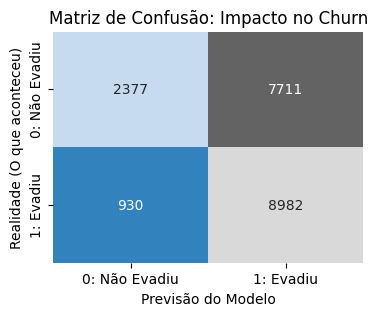

In [ ]:
cm = confusion_matrix(y_test, y_pred_final)

print("\nMatriz de Confusão:")
print(cm)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='tab20c', cbar=False,
            xticklabels=['0: Não Evadiu', '1: Evadiu'],
            yticklabels=['0: Não Evadiu', '1: Evadiu'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Realidade (O que aconteceu)')
plt.title('Matriz de Confusão: Impacto no Churn')
plt.show()

# 7. Métricas Treino × Teste (XGBoost – Modelo Final)

In [ ]:
def avaliar_treino_teste(modelo, X_train, y_train, X_test, y_test, threshold):
    y_train_probs = modelo.predict_proba(X_train)[:, 1]
    y_test_probs = modelo.predict_proba(X_test)[:, 1]

    y_train_pred = (y_train_probs >= threshold).astype(int)
    y_test_pred = (y_test_probs >= threshold).astype(int)

    return pd.DataFrame({
        'Conjunto': ['Treino', 'Teste'],
        'Acurácia': [
            accuracy_score(y_train, y_train_pred),
            accuracy_score(y_test, y_test_pred)
        ],
        'Precisão': [
            precision_score(y_train, y_train_pred),
            precision_score(y_test, y_test_pred)
        ],
        'Recall': [
            recall_score(y_train, y_train_pred),
            recall_score(y_test, y_test_pred)
        ],
        'F1-Score': [
            f1_score(y_train, y_train_pred),
            f1_score(y_test, y_test_pred)
        ]
    })

df_avaliacao = avaliar_treino_teste(
    modelo_xgb,
    X_train_tree,
    y_train,
    X_test_tree,
    y_test,
    best_threshold
)

df_avaliacao

,Conjunto,Acurácia,Precisão,Recall,F1-Score
0,Treino,0.585512,0.54873,0.921715,0.687918
1,Teste,0.567950,0.53807,0.906174,0.675211


**Gráfico Treino × Teste (Métricas)**

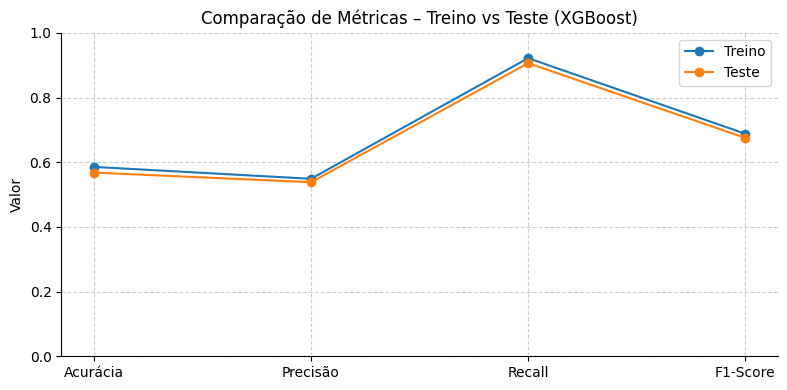

In [ ]:
metricas = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']

treino_vals = df_avaliacao.loc[df_avaliacao['Conjunto'] == 'Treino', metricas].values.flatten()
teste_vals = df_avaliacao.loc[df_avaliacao['Conjunto'] == 'Teste', metricas].values.flatten()

plt.figure(figsize=(8, 4))
plt.plot(metricas, treino_vals, marker='o', label='Treino')
plt.plot(metricas, teste_vals, marker='o', label='Teste')

plt.title('Comparação de Métricas – Treino vs Teste (XGBoost)')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
sns.despine()
plt.show()

**Curva de Aprendizado (Learning Curve)**

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    estimator=modelo_xgb,
    X=X_train_tree,
    y=y_train,
    cv=3,
    scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

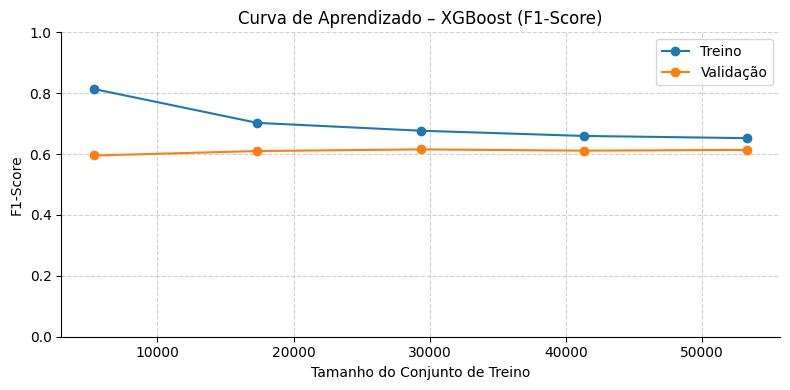

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_mean, marker='o', label='Treino')
plt.plot(train_sizes, test_mean, marker='o', label='Validação')

plt.title('Curva de Aprendizado – XGBoost (F1-Score)')
plt.xlabel('Tamanho do Conjunto de Treino')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
sns.despine()
plt.show()

#8. Serialização do modelo

In [ ]:
#Criando a classe de Pipeline
FEATURES = [
    'months', 'rev_Mean', 'mou_Mean', 'totcalls', 'eqpdays',
    'rev_per_minute', 'calls_per_month', 'eqp_age_index',
    'custcare_Mean', 'drop_vce_Mean', 'blck_vce_Mean',
    'avgmou', 'avgrev'
]

class ChurnPipeline:
    def __init__(self, model, features, threshold):
        self.model = model
        self.features = features
        self.threshold = threshold

    def predict_proba(self, X):
        X_sel = X[self.features]
        return self.model.predict_proba(X_sel)[:, 1]

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= self.threshold).astype(int)

In [ ]:
#Criando o pipeline final
pipeline_churn = ChurnPipeline(
    model=modelo_xgb,
    features=FEATURES,
    threshold=best_threshold
)

In [ ]:
#Salvando o pipeline em arquivo
joblib.dump(pipeline_churn, 'pipeline_churn_hackathon.joblib')

print("✅ Pipeline salvo com sucesso: pipeline_churn_hackathon.joblib")

✅ Pipeline salvo com sucesso: pipeline_churn_hackathon.joblib


**Carregando o Pipeline**

In [ ]:
pipeline = joblib.load('pipeline_churn_hackathon.joblib')
predicoes = pipeline.predict(df)
probabilidades = pipeline.predict_proba(df)

In [ ]:
print("Primeiras 10 Predições:")
print(predicoes[:10])

print("\nPrimeiras 10 Probabilidades (para a classe positiva - churn):")
print(probabilidades[:10])

Primeiras 10 Predições:
[0 1 1 1 1 1 1 0 1 0]

Primeiras 10 Probabilidades (para a classe positiva - churn):
[0.28710964 0.48564914 0.78245354 0.535434   0.40612054 0.43225157
 0.8452404  0.28534836 0.40238604 0.2640127 ]


# 9. Geração de arquivo CSV

**Arquivo CSV**

In [ ]:
# Gerar probabilidades e predições
df_resultado = X_test_tree.copy()

df_resultado['prob_churn'] = modelo_xgb.predict_proba(X_test_tree)[:, 1]
df_resultado['churn_pred'] = (df_resultado['prob_churn'] >= best_threshold).astype(int)

df_resultado.to_csv('predicoes_churn_hackathon.csv', index=False)
print("Arquivo 'predicoes_churn_hackathon.csv' gerado com sucesso.")

Arquivo 'predicoes_churn_hackathon.csv' gerado com sucesso.


In [ ]:
df_csv = pd.read_csv('predicoes_churn_hackathon.csv')
df_csv.head(5)

,months,rev_Mean,mou_Mean,totcalls,eqpdays,rev_per_minute,calls_per_month,eqp_age_index,custcare_Mean,drop_vce_Mean,blck_vce_Mean,avgmou,avgrev,prob_churn,churn_pred
0,12,43.5650,912.50,2035,232.0,0.047690,156.538462,17.846154,0.000000,6.666667,4.666667,927.70,52.06,0.612350,1
1,10,47.4925,377.25,786,307.0,0.125558,71.454545,27.909091,0.000000,10.333333,2.000000,321.75,40.07,0.597900,1
2,7,75.2150,782.25,1378,210.0,0.096029,172.250000,26.250000,3.000000,16.000000,0.000000,611.67,81.14,0.285624,0
3,23,118.7425,1448.50,17435,449.0,0.081920,726.458333,18.708333,0.666667,12.333333,0.000000,1445.45,123.51,0.479842,1
4,9,14.0450,575.25,1485,18.0,0.024373,148.500000,1.800000,0.000000,3.333333,15.000000,668.50,21.65,0.331217,0


**CSV PRODUÇÃO**

In [ ]:
from datetime import datetime

# Base de saída
df_output = pd.DataFrame(index=X_test_tree.index)

# ID do cliente
if 'customer_id' in df.columns:
    df_output['customer_id'] = df.loc[X_test_tree.index, 'customer_id']
else:
    df_output['customer_id'] = X_test_tree.index

#Adicionar previsões e probabilidades
df_output['prob_churn'] = modelo_xgb.predict_proba(X_test_tree)[:, 1]
df_output['churn_pred'] = (df_output['prob_churn'] >= best_threshold).astype(int)

#Nível de risco
def classificar_risco(p):
    if p >= 0.7:
        return 'Alto'
    elif p >= best_threshold:
        return 'Médio'
    else:
        return 'Baixo'

df_output['risk_level'] = df_output['prob_churn'].apply(classificar_risco)

#Metadata de produção
df_output['model_name'] = 'XGBoost_Churn_v1'
df_output['threshold'] = round(best_threshold, 2)
df_output['scoring_date'] = datetime.now().strftime('%Y-%m-%d')

#Ordenar e salvar CSV
df_output = df_output[
    [
        'customer_id',
        'prob_churn',
        'churn_pred',
        'risk_level',
        'model_name',
        'threshold',
        'scoring_date'
    ]
].sort_values(by='prob_churn', ascending=False)

df_output.to_csv('churn_predictions_production.csv', index=False)

print("✅ Arquivo 'churn_predictions_production.csv' gerado com sucesso.")


✅ Arquivo 'churn_predictions_production.csv' gerado com sucesso.


In [ ]:
df_csv = pd.read_csv('churn_predictions_production.csv')
df_csv.head(5)

,customer_id,prob_churn,churn_pred,risk_level,model_name,threshold,scoring_date
0,56025,0.935760,1,Alto,XGBoost_Churn_v1,0.35,2026-01-01
1,57207,0.933266,1,Alto,XGBoost_Churn_v1,0.35,2026-01-01
2,79272,0.932252,1,Alto,XGBoost_Churn_v1,0.35,2026-01-01
3,77966,0.930285,1,Alto,XGBoost_Churn_v1,0.35,2026-01-01
4,45780,0.921596,1,Alto,XGBoost_Churn_v1,0.35,2026-01-01
